In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [5]:
# plt.style.use('seaborn-darkgrid')
sns.set_palette('gray')

In [8]:
df_did = pd.read_csv('../data/clean_data.csv')[['cause_name', 'year', 'val_number', 'val_rate', 'val']]
df_did.head()

,cause_name,year,val_number,val_rate,val
0,Diarrheal diseases,1980,408.459710,4.109768,0.008212
1,Meningitis,1980,554.730157,5.581486,0.011152
2,Chronic kidney disease,1982,674.474715,6.676153,0.012416
3,Chronic kidney disease,1984,742.496116,7.221332,0.012411
4,Diarrheal diseases,1982,432.038245,4.276444,0.007953


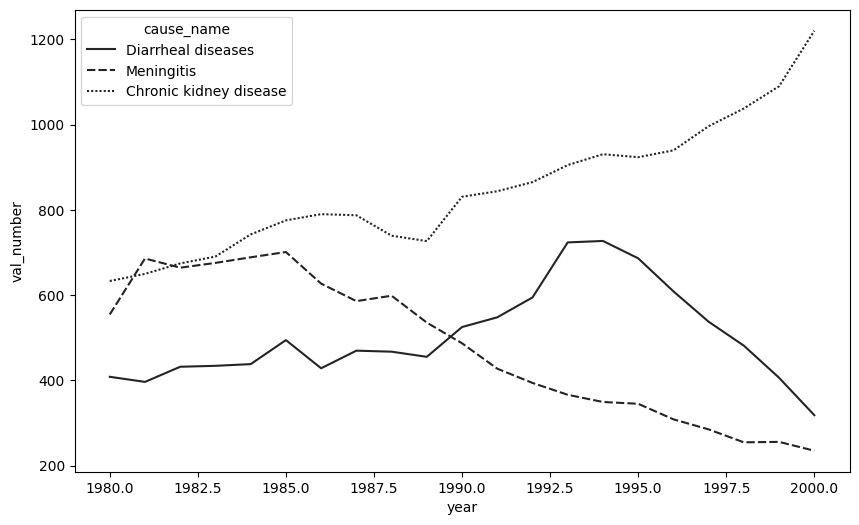

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(df_did, x = 'year', y='val_number', style='cause_name')
plt.show()

In [29]:
df_reg = df_did[df_did['year']>1981]
df_reg['t-t0'] = df_reg['year'] - df_reg['year'].min()
df_reg['t-tv'] = df_reg['year'] - 1990
df_reg['Tg']   = df_reg['cause_name'] == 'Meningitis' 
df_reg['Pt']   = df_reg['year'] > 1989
df_reg.head()

/var/folders/z_/jz4f3stj0xq5g99z3sb19w3r0000gn/T/ipykernel_20329/375630266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['t-t0'] = df_reg['year'] - df_reg['year'].min()
/var/folders/z_/jz4f3stj0xq5g99z3sb19w3r0000gn/T/ipykernel_20329/375630266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['t-tv'] = df_reg['year'] - 1990
/var/folders/z_/jz4f3stj0xq5g99z3sb19w3r0000gn/T/ipykernel_20329/375630266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,cause_name,year,val_number,val_rate,val,t-t0,t-tv,Tg,Pt,_beta
2,Chronic kidney disease,1982,674.474715,6.676153,0.012416,0,-8,False,False,0
3,Chronic kidney disease,1984,742.496116,7.221332,0.012411,2,-6,False,False,0
4,Diarrheal diseases,1982,432.038245,4.276444,0.007953,0,-8,False,False,0
5,Meningitis,1982,664.456552,6.576990,0.012232,0,-8,True,False,0
6,Diarrheal diseases,1984,438.216567,4.261985,0.007325,2,-6,False,False,0


In [22]:
df_reg['Tg'] = df_reg['Tg'].astype(int)
df_reg['Pt'] = df_reg['Pt'].astype(int)
df_reg.head()

,cause_name,year,val_number,val_rate,val,t-t0,t-tv,Tg,Pt
0,Diarrheal diseases,1980,408.459710,4.109768,0.008212,0,-10,0,0
1,Meningitis,1980,554.730157,5.581486,0.011152,0,-10,1,0
2,Chronic kidney disease,1982,674.474715,6.676153,0.012416,2,-8,0,0
3,Chronic kidney disease,1984,742.496116,7.221332,0.012411,4,-6,0,0
4,Diarrheal diseases,1982,432.038245,4.276444,0.007953,2,-8,0,0


In [23]:
df_reg['_beta'] = df_reg['Pt']*df_reg['Tg']*df_reg['t-tv']
df_reg.head()

,cause_name,year,val_number,val_rate,val,t-t0,t-tv,Tg,Pt,_beta
0,Diarrheal diseases,1980,408.459710,4.109768,0.008212,0,-10,0,0,0
1,Meningitis,1980,554.730157,5.581486,0.011152,0,-10,1,0,0
2,Chronic kidney disease,1982,674.474715,6.676153,0.012416,2,-8,0,0,0
3,Chronic kidney disease,1984,742.496116,7.221332,0.012411,4,-6,0,0,0
4,Diarrheal diseases,1982,432.038245,4.276444,0.007953,2,-8,0,0,0


In [28]:
X_train = df_reg[df_reg][['t-t0', '_beta', 'Tg', 'Pt']]
y_train = df_reg['val']
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    val   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     9.921
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           3.48e-06
Time:                        20:12:22   Log-Likelihood:                 289.30
No. Observations:                  63   AIC:                            -568.6
Df Residuals:                      58   BIC:                            -557.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0104      0.001     13.351      0.0